# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

> **Note: This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.**

## Overview

This notebook explores Dandiset 000690 from the DANDI Archive. The [Allen Institute Openscope - Vision2Hippocampus project](https://dandiarchive.org/dandiset/000690) investigates how visual information is processed across the brain, from the thalamus through the primary visual cortex and higher-order visual areas, all the way to the hippocampus.

The project addresses the question: How does the representation of visual stimuli evolve from simple sensory input to abstract concepts across the brain's processing hierarchy?

In this study, mice were presented with two main categories of visual stimuli:

1. **Simple visual motion**: Basic stimuli like bars of light with various parameters:
   - Standard white bar on black background (15° wide)
   - Wider bar (45°)
   - Slower moving bar
   - Contrast-reversed bar (black on white)
   - "Disco" bar with changing colors
   - Bars with different "vanishing" protocols at screen edges

2. **Complex ethologically valid stimuli**: Movies featuring eagles and other animals

During the presentation of these stimuli, neural activity was recorded using Neuropixel probes in different brain regions.

## Required Packages

The following packages are needed to run this notebook:

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dandi.dandiapi import DandiAPIClient
import seaborn as sns
from tqdm.notebook import tqdm

## Loading the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:500]}...")  # Show first 500 chars

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015
Description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away fr...


### Exploring Available Assets

In [3]:
# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")

# Display a summary of asset types
asset_types = {}
for asset in assets:
    file_type = asset.path.split('.')[-1]
    if file_type not in asset_types:
        asset_types[file_type] = 0
    asset_types[file_type] += 1

print("\nAsset types summary:")
for file_type, count in asset_types.items():
    print(f"- {file_type}: {count}")

# Show a few examples of the file paths
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")


Found 156 assets in the dataset

Asset types summary:
- nwb: 156

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb


## Examining an NWB File

Let's examine one of the NWB files that contains electrophysiology data. We'll use the file `sub-695435/sub-695435_ses-1309235849_probe-0_ecephys.nwb` which contains Local Field Potential (LFP) recordings from probe 0.

In [4]:
# Define the file URL for the NWB file we'll explore
asset_id = "ecaed1ec-a8b5-4fe7-87c1-baf68cfa900f"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
neurosift_url = f"https://neurosift.app/nwb?url={url}&dandisetId=000690&dandisetVersion=draft"

print(f"Loading NWB file: sub-695435/sub-695435_ses-1309235849_probe-0_ecephys.nwb")
print(f"You can explore this file in Neurosift at: {neurosift_url}")

# Open the file for reading
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file: sub-695435/sub-695435_ses-1309235849_probe-0_ecephys.nwb
You can explore this file in Neurosift at: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ecaed1ec-a8b5-4fe7-87c1-baf68cfa900f/download/&dandisetId=000690&dandisetVersion=draft


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Metadata

Let's examine the basic metadata of this NWB file to understand what it contains.

In [5]:
# Print basic metadata about the file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File creation date: {nwb.file_create_date[0]}")

Session description: LFP data and associated info for one probe
Identifier: 0
Session start time: 2023-11-07 00:00:00-08:00
File creation date: 2023-12-13 23:21:01.902672-08:00


### Subject Information

This file contains data from a single experimental subject (mouse). Let's look at the subject details.

In [6]:
# Print subject information
print(f"Species: {nwb.subject.species}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age} (reference: {nwb.subject.age__reference})")
print(f"Age in days: {nwb.subject.age_in_days}")
print(f"Sex: {nwb.subject.sex}")
print(f"Strain: {nwb.subject.strain}")
print(f"Genotype: {nwb.subject.genotype}")

Species: Mus musculus
Subject ID: 695435
Age: P109D (reference: birth)
Age in days: 109.0
Sex: M
Strain: Transgenic
Genotype: wt/wt


### Electrode Information

Let's examine the electrodes in this recording.

In [7]:
# Get the electrode information as a DataFrame
electrode_df = nwb.electrodes.to_dataframe()

print(f"Total number of electrodes: {len(electrode_df)}")
print("\nElectrode column names:")
for col in electrode_df.columns:
    print(f"- {col}")

print("\nFirst 5 electrodes:")
electrode_df.head()

Total number of electrodes: 84

Electrode column names:
- location
- group
- group_name
- probe_vertical_position
- probe_horizontal_position
- probe_id
- local_index
- valid_data
- x
- y
- z
- imp
- filtering

First 5 electrodes:


,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
2,CA3,probeA abc.EcephysElectrodeGroup at 0x14041056...,probeA,40,59,0,2,True,8234.0,4272.0,8964.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
6,CA3,probeA abc.EcephysElectrodeGroup at 0x14041056...,probeA,80,59,0,6,True,8246.0,4237.0,8980.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
10,CA3,probeA abc.EcephysElectrodeGroup at 0x14041056...,probeA,120,59,0,10,True,8257.0,4202.0,8996.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
14,CA3,probeA abc.EcephysElectrodeGroup at 0x14041056...,probeA,160,59,0,14,True,8271.0,4156.0,9016.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
18,CA3,probeA abc.EcephysElectrodeGroup at 0x14041056...,probeA,200,59,0,18,True,8283.0,4120.0,9032.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


Let's check how many of these electrodes have valid data:

In [8]:
valid_electrodes = electrode_df[electrode_df['valid_data'] == True]
print(f"Number of valid electrodes: {len(valid_electrodes)} out of {len(electrode_df)}")

Number of valid electrodes: 84 out of 84


### Exploring the LFP Data

This file contains Local Field Potential (LFP) data from the probe. Let's explore this data.

In [9]:
# Access the LFP data
lfp = nwb.acquisition['probe_0_lfp']
lfp_data = lfp.electrical_series['probe_0_lfp_data']

# Print information about the LFP data
print(f"LFP data shape: {lfp_data.data.shape}")
print(f"Number of channels: {lfp_data.data.shape[1]}")
print(f"Number of time points: {lfp_data.data.shape[0]}")
print(f"Unit: {lfp_data.unit}")
print(f"Sampling interval: {lfp_data.interval}")

# Let's check the timestamps for the first and last few data points
print("\nFirst 3 timestamps (in seconds):")
print(lfp_data.timestamps[:3])
print("\nLast 3 timestamps (in seconds):")
print(lfp_data.timestamps[-3:])

# Calculate recording duration
duration = lfp_data.timestamps[-1] - lfp_data.timestamps[0]
print(f"\nRecording duration: {duration:.2f} seconds ({duration/60:.2f} minutes)")

LFP data shape: (8965175, 84)
Number of channels: 84
Number of time points: 8965175
Unit: volts
Sampling interval: 1

First 3 timestamps (in seconds):


[40.80216459 40.80296459 40.80376459]

Last 3 timestamps (in seconds):


[7212.91709003 7212.91789002 7212.91869002]

Recording duration: 7172.12 seconds (119.54 minutes)


## Visualizing the LFP Data

Let's visualize the LFP data from a subset of time points and channels to get a sense of the neural activity.

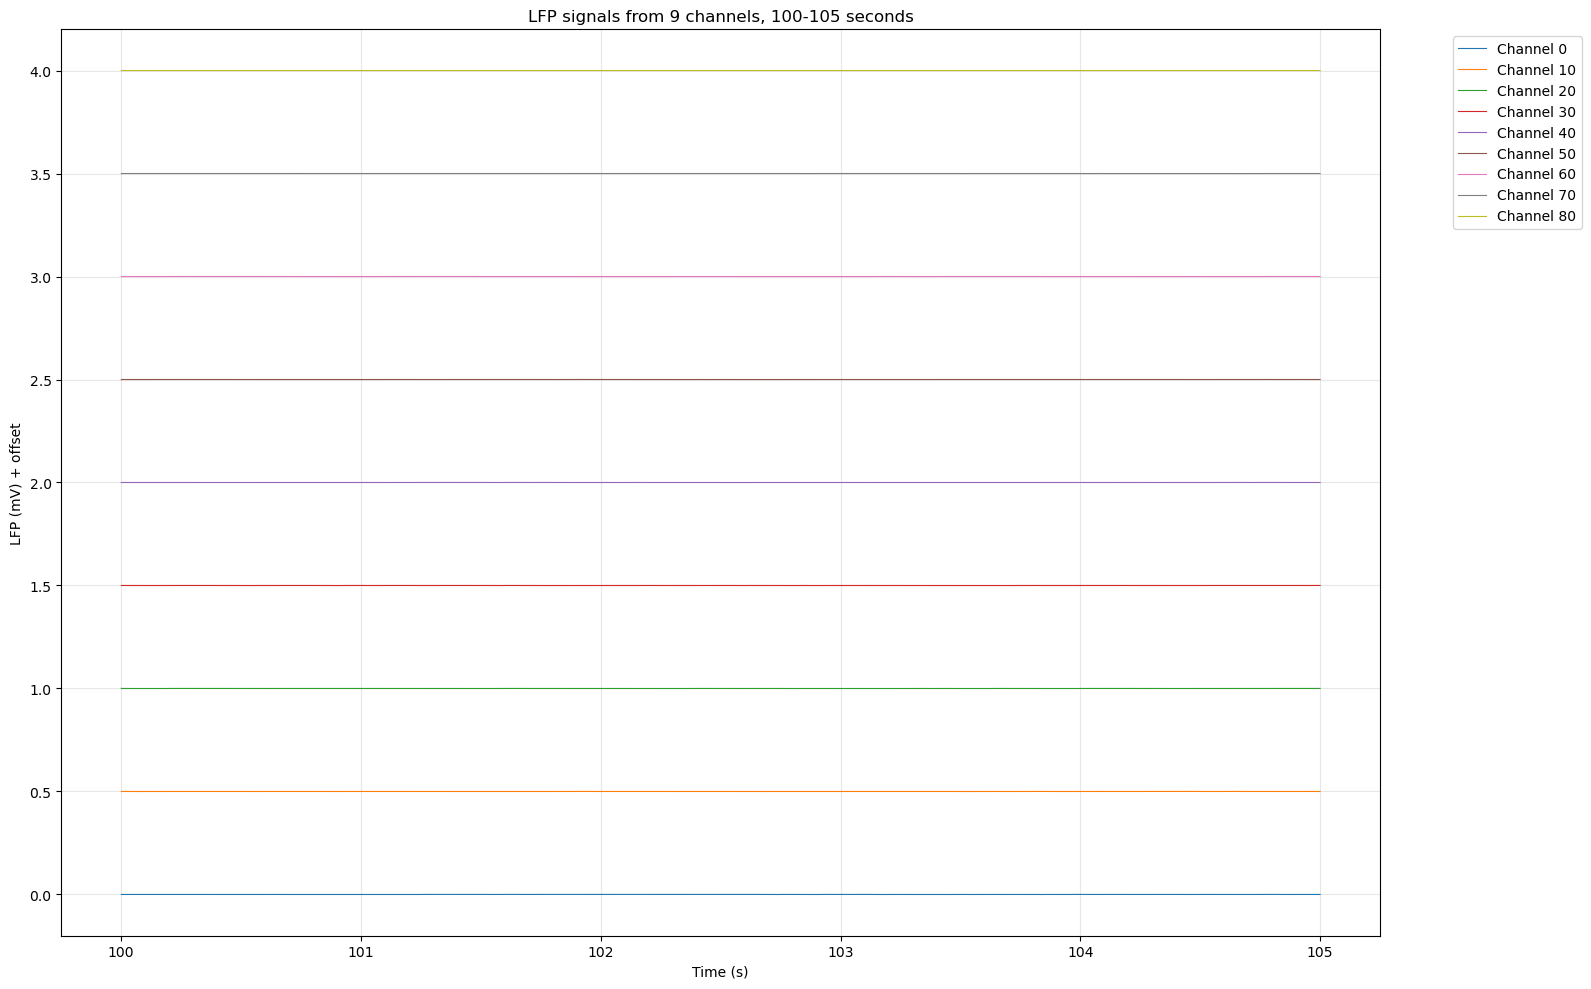

In [10]:
# Define a time window and a subset of channels to visualize
start_time = 100  # seconds
window_size = 5  # seconds

# Get the indices corresponding to the time window
start_idx = np.argmin(np.abs(lfp_data.timestamps[:] - start_time))
end_idx = np.argmin(np.abs(lfp_data.timestamps[:] - (start_time + window_size)))

# Select a subset of channels to display (every 10th channel)
channels_to_display = np.arange(0, lfp_data.data.shape[1], 10)

# Get the data for the selected time window and channels
time_slice = slice(start_idx, end_idx)
selected_data = lfp_data.data[time_slice, :][:, channels_to_display]
selected_timestamps = lfp_data.timestamps[time_slice]

# Plot the data
plt.figure(figsize=(14, 10))
for i, channel_idx in enumerate(channels_to_display):
    # Offset each channel for visibility
    offset = i * 0.5  # mV offset for visualization
    plt.plot(selected_timestamps, selected_data[:, i] + offset, 
             linewidth=0.8, label=f"Channel {channel_idx}")

plt.xlabel('Time (s)')
plt.ylabel('LFP (mV) + offset')
plt.title(f'LFP signals from {len(channels_to_display)} channels, {start_time}-{start_time+window_size} seconds')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add a legend with channel indices outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Examining Electrode Locations

Let's examine the anatomical locations of the electrodes in more detail.

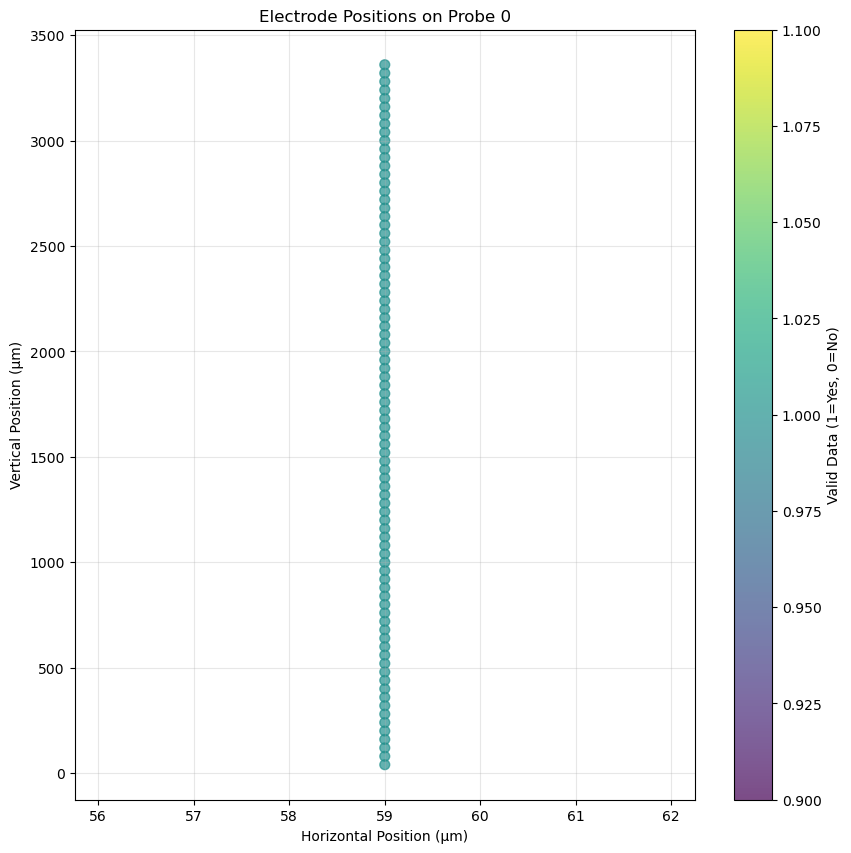

In [11]:
# Create a scatter plot of electrode positions
plt.figure(figsize=(10, 10))
plt.scatter(electrode_df['probe_horizontal_position'], 
            electrode_df['probe_vertical_position'],
            c=electrode_df['valid_data'].astype(int), 
            cmap='viridis', 
            s=50, 
            alpha=0.7)

plt.colorbar(label='Valid Data (1=Yes, 0=No)')
plt.xlabel('Horizontal Position (μm)')
plt.ylabel('Vertical Position (μm)')
plt.title('Electrode Positions on Probe 0')
plt.grid(True, alpha=0.3)
plt.show()

Let's also look at a breakdown of electrodes by brain region (location):

Distribution of electrodes by brain region:
location
CA1        33
none       14
CA3         9
VISl5       7
DG          7
VISl6       4
VISl2/3     4
VISl4       3
VISl1       3
Name: count, dtype: int64


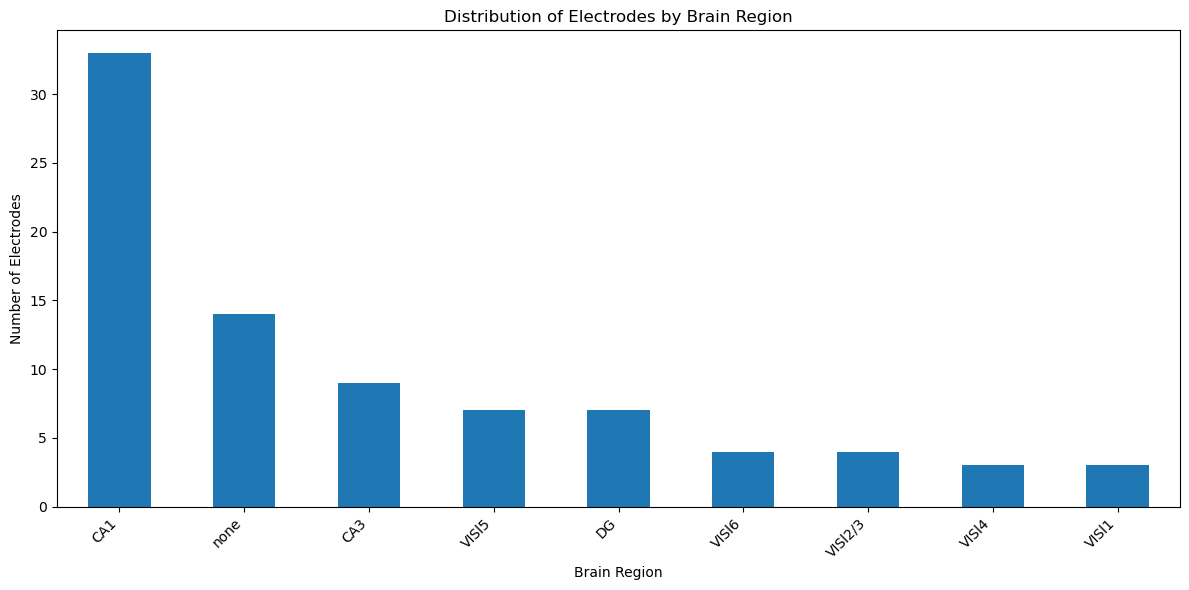

In [12]:
# Check the distribution of brain regions
region_counts = electrode_df['location'].value_counts()
print("Distribution of electrodes by brain region:")
print(region_counts)

# Visualize the distribution
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.xlabel('Brain Region')
plt.ylabel('Number of Electrodes')
plt.title('Distribution of Electrodes by Brain Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Loading the Main Session File to Get Stimulus Information

To understand the context of the neural activity, let's load the main session file which contains information about the visual stimuli presented during the recording.

In [13]:
# Define the file URL for the main session NWB file
main_session_asset_id = "d3cfc0e4-eaa6-4cc0-b1de-9ed257cf0009"
main_session_url = f"https://api.dandiarchive.org/api/assets/{main_session_asset_id}/download/"

print(f"Loading main session NWB file: sub-695435/sub-695435_ses-1309235849.nwb")

# Open the file for reading
main_remote_file = remfile.File(main_session_url)
main_h5_file = h5py.File(main_remote_file)
main_io = pynwb.NWBHDF5IO(file=main_h5_file)
session_nwb = main_io.read()

Loading main session NWB file: sub-695435/sub-695435_ses-1309235849.nwb


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Exploring Stimulus Information

In [14]:
# Get the list of available intervals which represent stimulus presentations
stimulus_intervals = [name for name in session_nwb.intervals.keys() 
                     if 'presentations' in name and not name.startswith('natmovie_')]

print(f"Number of stimulus presentation intervals: {len(stimulus_intervals)}")
print("\nStimulus types:")
for stimulus in stimulus_intervals[:10]:  # Display first 10 for brevity
    print(f"- {stimulus}")

# Let's choose one stimulus type to explore
selected_stimulus = "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations"
stim_presentations = session_nwb.intervals[selected_stimulus]

# Convert to DataFrame for easier exploration
stim_df = stim_presentations.to_dataframe()
print(f"\nFound {len(stim_df)} presentations of {selected_stimulus}")
print("\nColumns in stimulus presentations dataframe:")
for col in stim_df.columns:
    print(f"- {col}")

# Show a few example presentations
print("\nFirst 5 presentations:")
stim_df[['start_time', 'stop_time', 'stimulus_name', 'orientation', 'contrast']].head()

Number of stimulus presentation intervals: 16

Stimulus types:
- Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
- SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations
- SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations
- SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations
- SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations
- SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations



Found 57600 presentations of SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations

Columns in stimulus presentations dataframe:
- start_time
- stop_time
- stimulus_name
- stimulus_block
- Image
- color
- contrast
- opacity
- orientation
- size
- units
- stimulus_index
- tags
- timeseries

First 5 presentations:


,start_time,stop_time,stimulus_name,orientation,contrast
id,,,,,
0,130.62476,130.64143,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,1.0
1,130.62476,130.64143,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,1.0
2,130.64143,130.65812,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,1.0
3,130.64143,130.65812,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,1.0
4,130.65812,130.67479,SAC_Wd15_Vel2_Bndry1_Cntst0_loop,0.0,1.0


## Aligning LFP Data with Visual Stimuli

Let's align the LFP data with the visual stimulus presentations to see if there are any apparent responses to the stimuli.

Selected stimulus presentation: index 100
Start time: 131.46s, Stop time: 131.48s, Duration: 0.02s


Selected brain region: CA3
Number of channels selected: 9


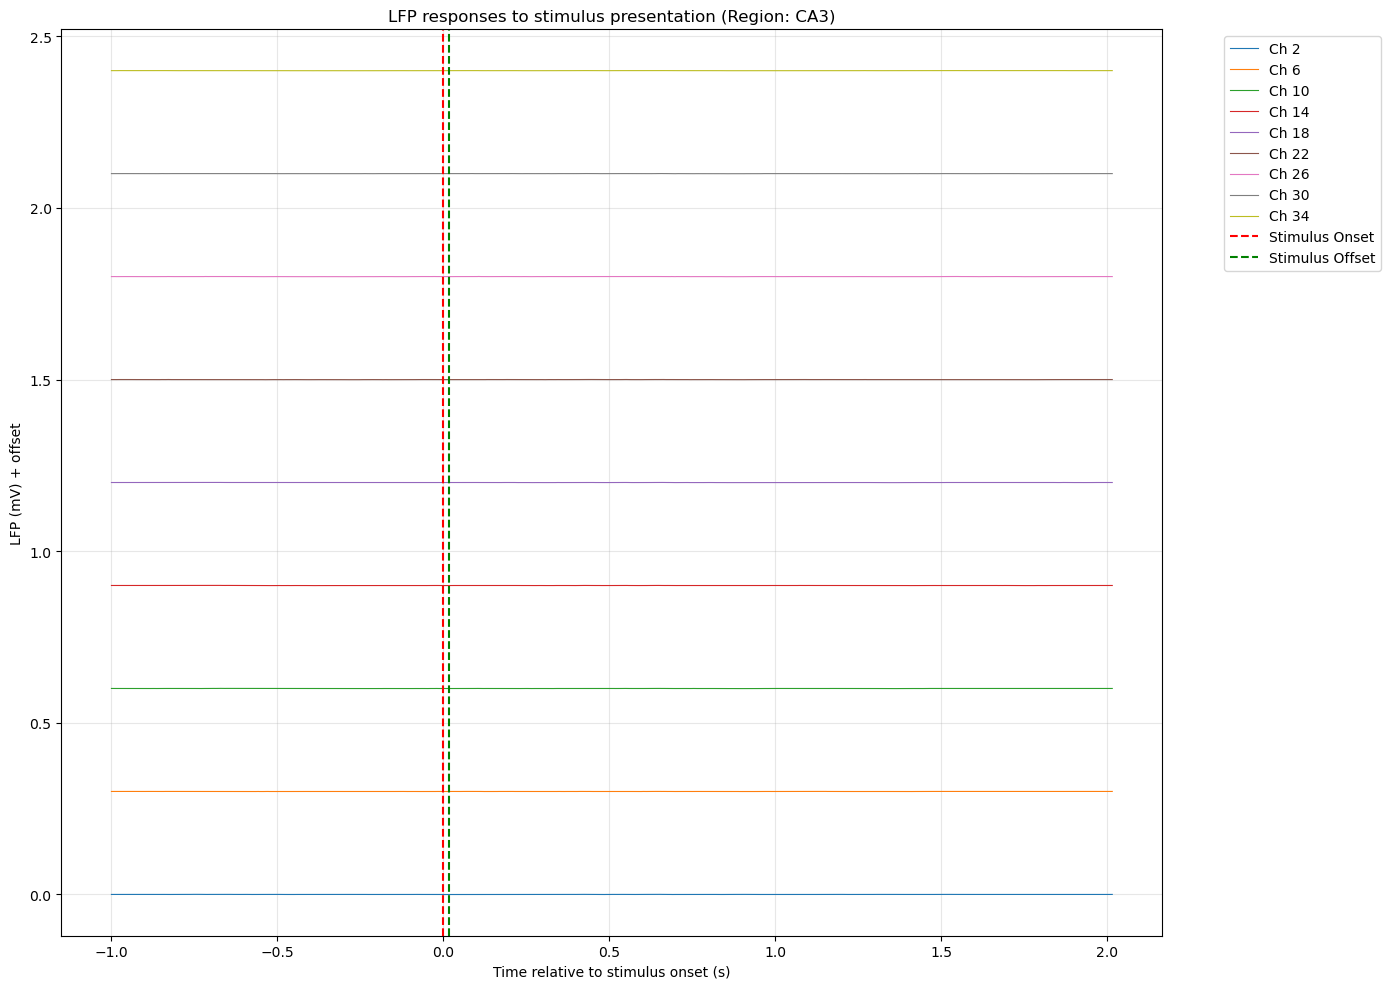

In [15]:
# Let's select a single stimulus presentation and look at the neural activity around it
presentation_idx = 100  # Arbitrary choice for demonstration
stim_start = stim_df.iloc[presentation_idx]['start_time']
stim_stop = stim_df.iloc[presentation_idx]['stop_time']
stim_duration = stim_stop - stim_start
print(f"Selected stimulus presentation: index {presentation_idx}")
print(f"Start time: {stim_start:.2f}s, Stop time: {stim_stop:.2f}s, Duration: {stim_duration:.2f}s")

# Define a window around this stimulus to analyze
pre_stim = 1.0  # seconds before stimulus
post_stim = 2.0  # seconds after stimulus
analysis_start = stim_start - pre_stim
analysis_stop = stim_stop + post_stim

# Find the data indices for this time window
start_idx = np.argmin(np.abs(lfp_data.timestamps[:] - analysis_start))
end_idx = np.argmin(np.abs(lfp_data.timestamps[:] - analysis_stop))

# Extract the data for this time window
time_window = lfp_data.timestamps[start_idx:end_idx]
data_window = lfp_data.data[start_idx:end_idx, :]

# Select a subset of channels (e.g., from a particular brain region)
# Let's choose channels from a specific brain region if available
unique_regions = electrode_df['location'].unique()
selected_region = unique_regions[0]  # Take the first region as an example
region_channels = electrode_df[electrode_df['location'] == selected_region]['local_index'].values
if len(region_channels) > 10:
    region_channels = np.random.choice(region_channels, 10, replace=False)  # Select 10 random channels
    
print(f"Selected brain region: {selected_region}")
print(f"Number of channels selected: {len(region_channels)}")

# Plot the data
plt.figure(figsize=(14, 10))
for i, channel in enumerate(region_channels):
    # Offset for visualization
    offset = i * 0.3
    plt.plot(time_window - stim_start, data_window[:, channel] + offset, linewidth=0.8, 
             label=f"Ch {channel}")

# Add vertical lines for stimulus onset and offset
plt.axvline(x=0, color='r', linestyle='--', label='Stimulus Onset')
plt.axvline(x=stim_duration, color='g', linestyle='--', label='Stimulus Offset')

plt.xlabel('Time relative to stimulus onset (s)')
plt.ylabel('LFP (mV) + offset')
plt.title(f'LFP responses to stimulus presentation (Region: {selected_region})')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Spectral Analysis of LFP Data

LFP data contains oscillatory activity at different frequencies that might be modulated by sensory stimuli. Let's perform a spectral analysis to examine these oscillations.

Using channel 2 from region CA3 for spectral analysis
Sampling frequency: 1250.00 Hz


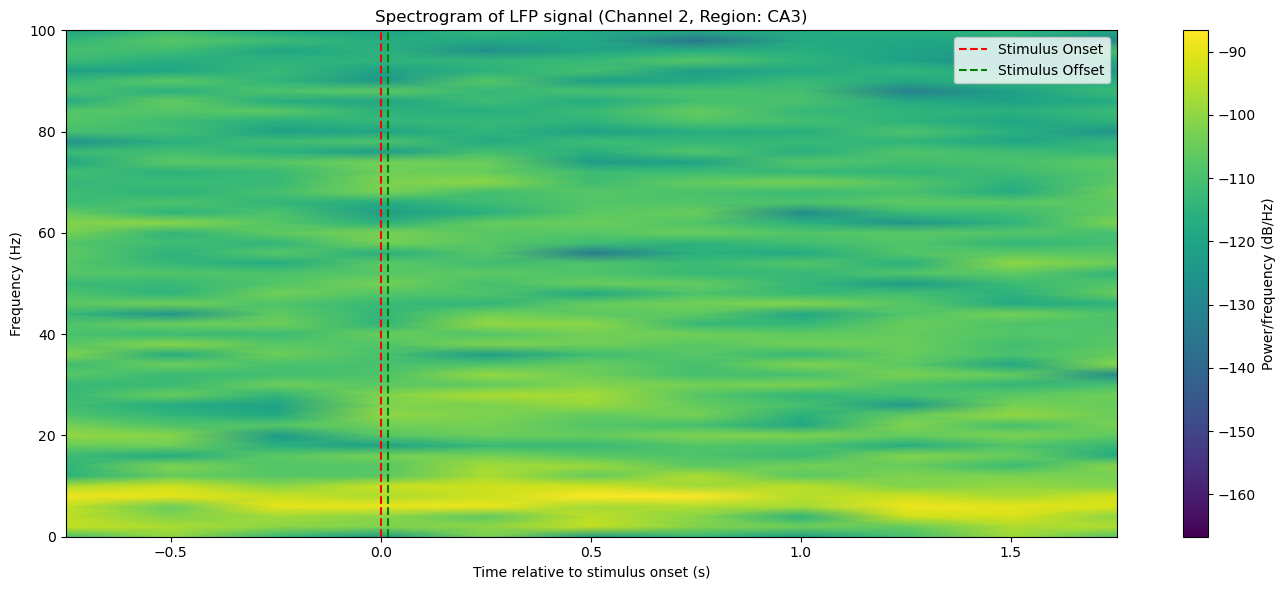

In [16]:
# Compute the power spectrum for a single channel over time
from scipy import signal

# Select a single channel for demonstration
channel_idx = region_channels[0]
print(f"Using channel {channel_idx} from region {selected_region} for spectral analysis")

# Parameters for spectrogram
fs = 1.0 / (lfp_data.timestamps[1] - lfp_data.timestamps[0])  # Sampling frequency
print(f"Sampling frequency: {fs:.2f} Hz")

# Compute the spectrogram for this time window
nperseg = int(fs * 0.5)  # 0.5 second segments
noverlap = nperseg // 2  # 50% overlap
f, t, Sxx = signal.spectrogram(data_window[:, channel_idx], fs=fs, 
                               nperseg=nperseg, noverlap=noverlap)

# Plot the spectrogram
plt.figure(figsize=(14, 6))
plt.pcolormesh(t + (analysis_start - stim_start), f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.colorbar(label='Power/frequency (dB/Hz)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time relative to stimulus onset (s)')
plt.title(f'Spectrogram of LFP signal (Channel {channel_idx}, Region: {selected_region})')

# Add vertical lines for stimulus onset and offset
plt.axvline(x=0, color='r', linestyle='--', label='Stimulus Onset')
plt.axvline(x=stim_duration, color='g', linestyle='--', label='Stimulus Offset')

plt.ylim(0, 100)  # Focus on 0-100 Hz range
plt.legend()
plt.tight_layout()
plt.show()

## Exploring Neural Activity During Different Stimulus Types

Let's compare the LFP responses during different types of visual stimuli. We'll focus on the power in specific frequency bands, which might reveal differential neural processing for different stimuli.

/opt/conda/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 2500 is greater than input length  = 20, using nperseg = 20
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


/opt/conda/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 2500 is greater than input length  = 21, using nperseg = 21
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


/opt/conda/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 2500 is greater than input length  = 21, using nperseg = 21
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


/opt/conda/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 2500 is greater than input length  = 20, using nperseg = 20
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


/opt/conda/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 2500 is greater than input length  = 21, using nperseg = 21
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


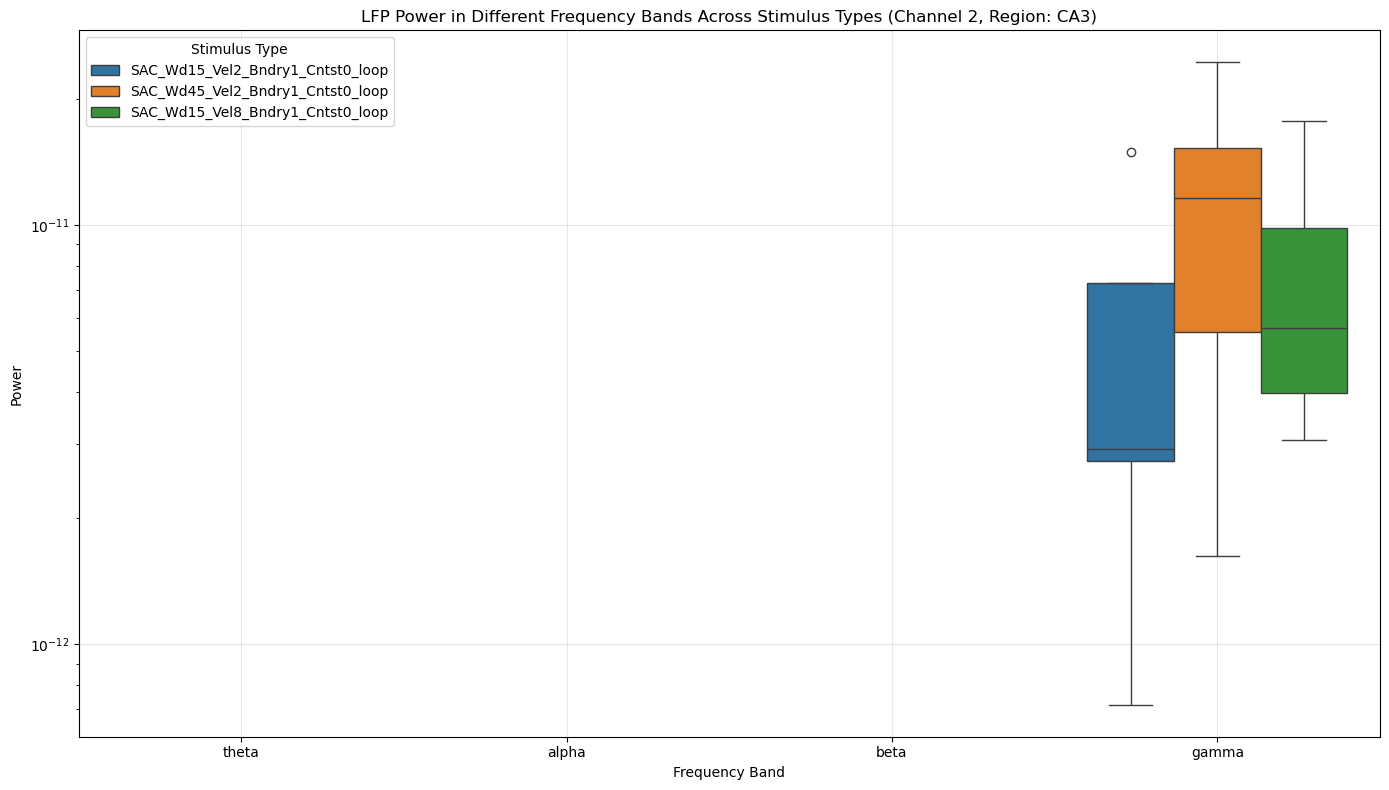

In [17]:
# Let's pick a few different stimulus types
stimulus_types = [
    "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations",  # Standard bar
    "SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations",  # Wider bar
    "SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations"   # Faster bar
]

# Function to compute power in a frequency band for a specific time window
def compute_band_power(data, fs, freq_range):
    """Compute power in a specific frequency band"""
    f, pxx = signal.welch(data, fs, nperseg=int(fs*2))
    band_indices = np.logical_and(f >= freq_range[0], f <= freq_range[1])
    band_power = np.mean(pxx[band_indices])
    return band_power

# Define frequency bands of interest
bands = {
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (15, 30),
    'gamma': (30, 80)
}

# Select a channel and region for the analysis
channel_idx = region_channels[0]
region = selected_region

# Compute band power for different stimulus types
results = []

# Sample a few presentations of each stimulus type for analysis
num_samples = 5
fs = 1.0 / (lfp_data.timestamps[1] - lfp_data.timestamps[0])

for stim_type in stimulus_types:
    stim_df = session_nwb.intervals[stim_type].to_dataframe()
    
    # Sample a few presentations (avoid sampling too many)
    sample_indices = np.random.choice(len(stim_df), min(num_samples, len(stim_df)), replace=False)
    
    for idx in sample_indices:
        stim_start = stim_df.iloc[idx]['start_time']
        stim_stop = stim_df.iloc[idx]['stop_time']
        
        # Find corresponding indices in LFP data
        start_idx = np.argmin(np.abs(lfp_data.timestamps[:] - stim_start))
        end_idx = np.argmin(np.abs(lfp_data.timestamps[:] - stim_stop))
        
        # Get the data for this stimulus
        stim_data = lfp_data.data[start_idx:end_idx, channel_idx]
        
        # Compute power in each frequency band
        for band_name, band_range in bands.items():
            band_power = compute_band_power(stim_data, fs, band_range)
            results.append({
                'stimulus_type': stim_type.split('_presentations')[0],
                'presentation_idx': idx,
                'band': band_name,
                'power': band_power
            })

# Convert to DataFrame for easier analysis and visualization
results_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(14, 8))
sns.boxplot(x='band', y='power', hue='stimulus_type', data=results_df)
plt.title(f'LFP Power in Different Frequency Bands Across Stimulus Types (Channel {channel_idx}, Region: {region})')
plt.xlabel('Frequency Band')
plt.ylabel('Power')
plt.yscale('log')  # Log scale for better visualization
plt.legend(title='Stimulus Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Accessing Units (Spike) Data

The main session file also contains sorted spike data ("units"). Let's explore the spiking activity in relation to the visual stimuli.

In [18]:
# First, let's check what unit information is available
print(f"Number of units (neurons): {len(session_nwb.units)}")

# Convert units to a DataFrame for easier exploration
units_df = session_nwb.units.to_dataframe()

# Look at the available columns
print("\nColumns in units dataframe:")
for col in units_df.columns:
    print(f"- {col}")

# Display summary statistics for some key properties
print("\nSummary of key unit properties:")
for column in ['firing_rate', 'snr', 'quality', 'presence_ratio', 'isi_violations']:
    if column in units_df.columns:
        print(f"\n{column}:")
        print(units_df[column].describe())

Number of units (neurons): 2251



Columns in units dataframe:
- peak_channel_id
- PT_ratio
- velocity_below
- snr
- silhouette_score
- waveform_halfwidth
- presence_ratio
- repolarization_slope
- d_prime
- cumulative_drift
- waveform_duration
- max_drift
- spread
- recovery_slope
- quality
- nn_hit_rate
- local_index
- nn_miss_rate
- firing_rate
- isi_violations
- isolation_distance
- cluster_id
- l_ratio
- velocity_above
- amplitude_cutoff
- amplitude
- spike_times
- spike_amplitudes
- waveform_mean

Summary of key unit properties:

firing_rate:
count    2251.000000
mean        5.007381
std         6.898658
min         0.000139
25%         0.577865
50%         2.734490
75%         6.329366
max        65.091044
Name: firing_rate, dtype: float64

snr:
count    2251.000000
mean        2.962594
std         1.412120
min        -1.000000
25%         2.037303
50%         2.568642
75%         3.567368
max        10.541364
Name: snr, dtype: float64

quality:
count     2251
unique       2
top       good
freq      1926
Name: qu

Let's select a few high-quality units and examine their spiking behavior around the stimulus presentations.

Found 923 high-quality units
Selected 5 units for analysis


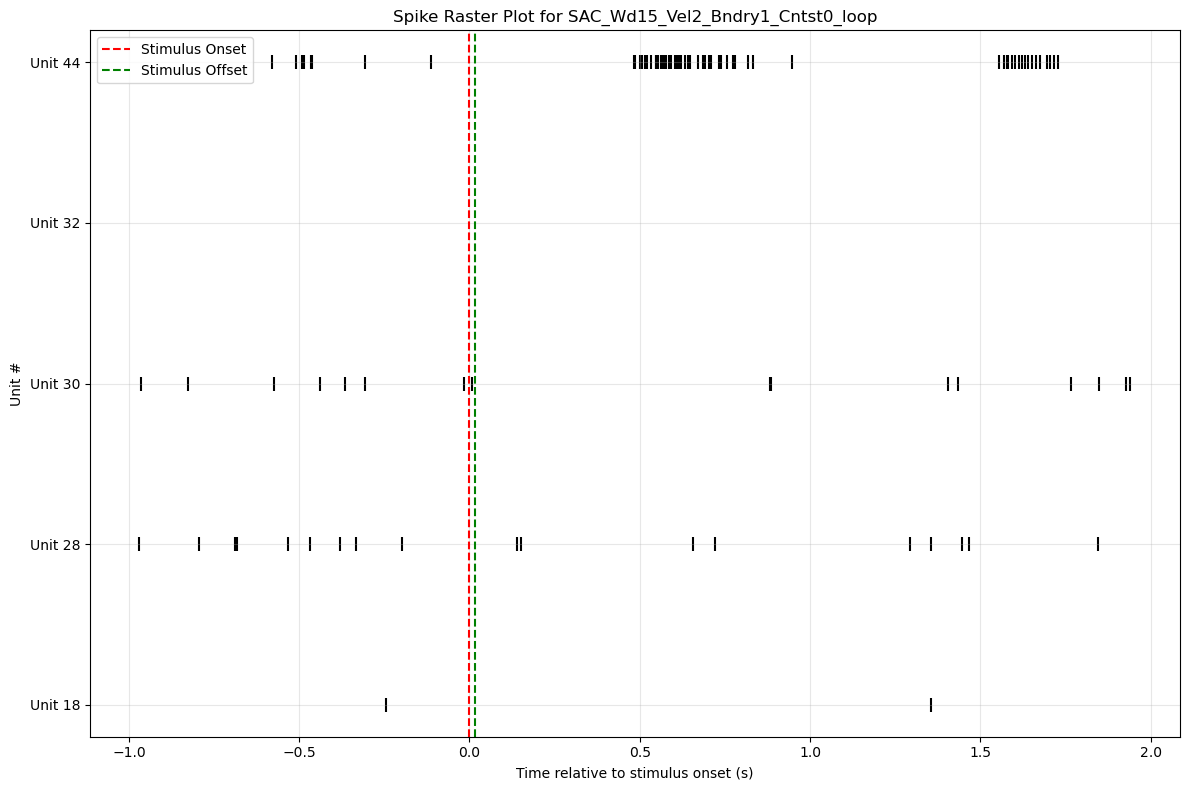

In [19]:
# Filter for high-quality units with good SNR and low ISI violations
high_quality_units = units_df[
    (units_df['quality'] == 'good') & 
    (units_df['snr'] > 2) & 
    (units_df['isi_violations'] < 0.1)
]

print(f"Found {len(high_quality_units)} high-quality units")

# Select a few units to analyze
units_to_analyze = high_quality_units.iloc[:5].index if len(high_quality_units) >= 5 else high_quality_units.index
print(f"Selected {len(units_to_analyze)} units for analysis")

# Let's create a raster plot for these units around a stimulus presentation
def create_raster_plot(stimulus_type, presentation_idx, units, time_window=(-1, 2)):
    """Create a raster plot for multiple units around a stimulus presentation"""
    stim_df = session_nwb.intervals[stimulus_type].to_dataframe()
    stim_start = stim_df.iloc[presentation_idx]['start_time']
    stim_stop = stim_df.iloc[presentation_idx]['stop_time']
    
    plt.figure(figsize=(12, 8))
    
    for i, unit_idx in enumerate(units):
        # Get spike times for this unit
        spike_times = session_nwb.units['spike_times'][unit_idx]
        
        # Filter spikes around the stimulus
        window_start = stim_start + time_window[0]
        window_end = stim_stop + time_window[1]
        mask = (spike_times >= window_start) & (spike_times <= window_end)
        spikes_in_window = spike_times[mask]
        
        # Normalize to stimulus onset
        spikes_normalized = spikes_in_window - stim_start
        
        # Plot spikes as a raster
        plt.scatter(spikes_normalized, np.ones_like(spikes_normalized) * i, 
                   marker='|', s=100, color='black')
    
    # Add vertical lines for stimulus onset and offset
    plt.axvline(x=0, color='r', linestyle='--', label='Stimulus Onset')
    plt.axvline(x=stim_stop - stim_start, color='g', linestyle='--', label='Stimulus Offset')
    
    plt.xlabel('Time relative to stimulus onset (s)')
    plt.ylabel('Unit #')
    plt.yticks(range(len(units)), [f"Unit {u}" for u in units])
    plt.title(f'Spike Raster Plot for {stimulus_type.split("_presentations")[0]}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Create a raster plot for one stimulus type
if len(units_to_analyze) > 0:
    create_raster_plot("SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations", 100, units_to_analyze)

## Exploring Eye Tracking Data

The main session file also contains eye tracking data, which can give us insights into the animal's gaze and attention during different stimuli.

Available eye tracking data types:
- corneal_reflection_tracking
- eye_tracking
- pupil_tracking

Pupil tracking data shape: (431910, 2)
Pupil area data shape: (431910,)
Timestamps length: 431910
Time range: 14.68052 - nan seconds


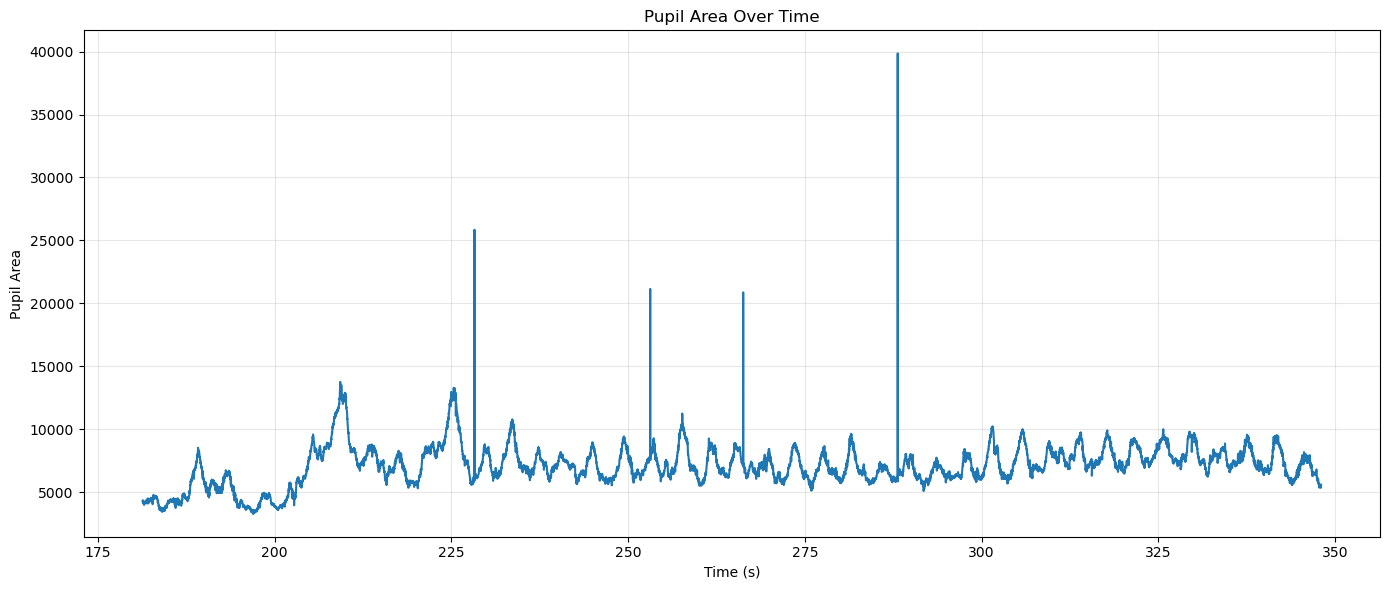

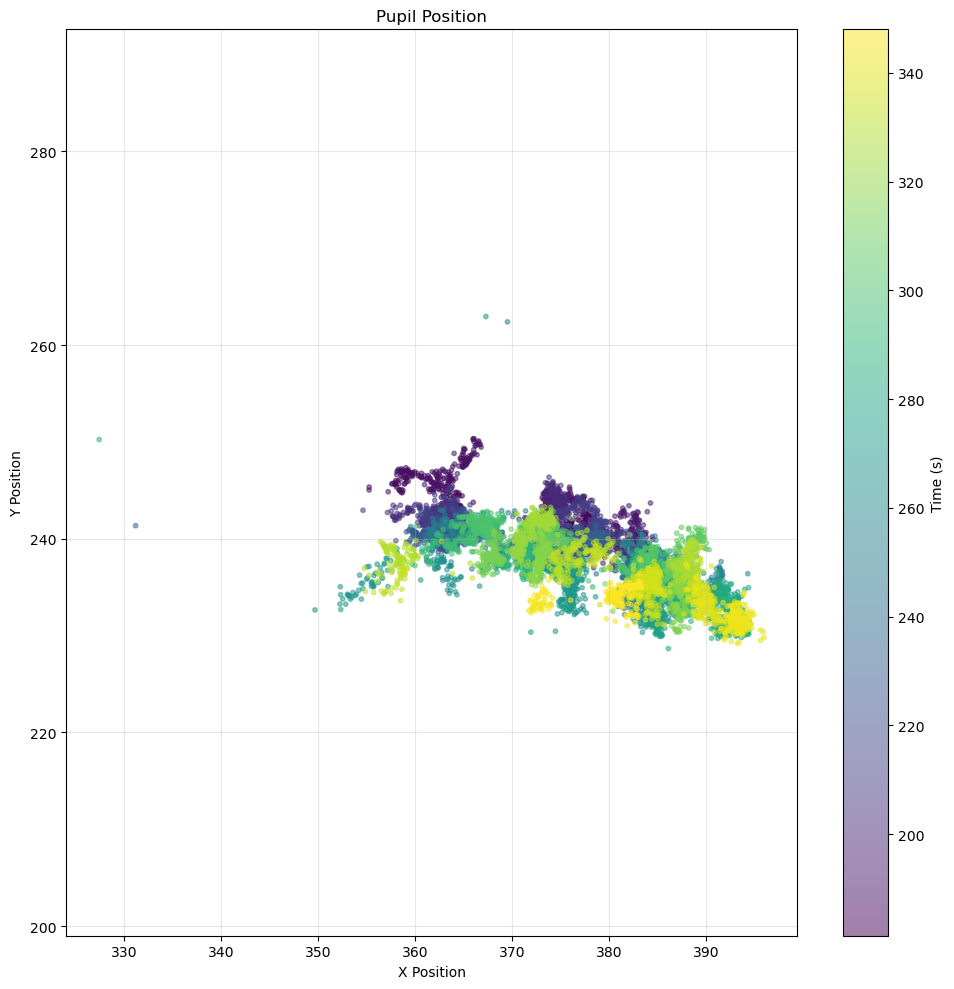

In [20]:
# Access the eye tracking data
if 'EyeTracking' in session_nwb.acquisition:
    eye_tracking = session_nwb.acquisition['EyeTracking']
    
    # Check available data types
    print("Available eye tracking data types:")
    for data_type in eye_tracking.spatial_series:
        print(f"- {data_type}")
    
    # Access pupil tracking data
    pupil_data = eye_tracking.pupil_tracking
    pupil_position = pupil_data.data[:]
    pupil_timestamps = pupil_data.timestamps[:]
    pupil_area = pupil_data.area[:]
    
    print(f"\nPupil tracking data shape: {pupil_position.shape}")
    print(f"Pupil area data shape: {pupil_area.shape}")
    print(f"Timestamps length: {len(pupil_timestamps)}")
    print(f"Time range: {pupil_timestamps[0]} - {pupil_timestamps[-1]} seconds")
    
    # Plot pupil area over time for a section of the recording
    sample_start = 10000
    sample_end = 20000
    
    plt.figure(figsize=(14, 6))
    plt.plot(pupil_timestamps[sample_start:sample_end], 
             pupil_area[sample_start:sample_end])
    plt.xlabel('Time (s)')
    plt.ylabel('Pupil Area')
    plt.title('Pupil Area Over Time')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Plot pupil position for a section of the recording
    plt.figure(figsize=(10, 10))
    plt.scatter(pupil_position[sample_start:sample_end, 0], 
                pupil_position[sample_start:sample_end, 1],
                c=pupil_timestamps[sample_start:sample_end], cmap='viridis', 
                s=10, alpha=0.5)
    plt.colorbar(label='Time (s)')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Pupil Position')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print("Eye tracking data not found in this file")

## Correlating Eye Movement with Neural Activity

Let's investigate if there's a relationship between the animal's eye movements and neural activity during stimulus presentations.

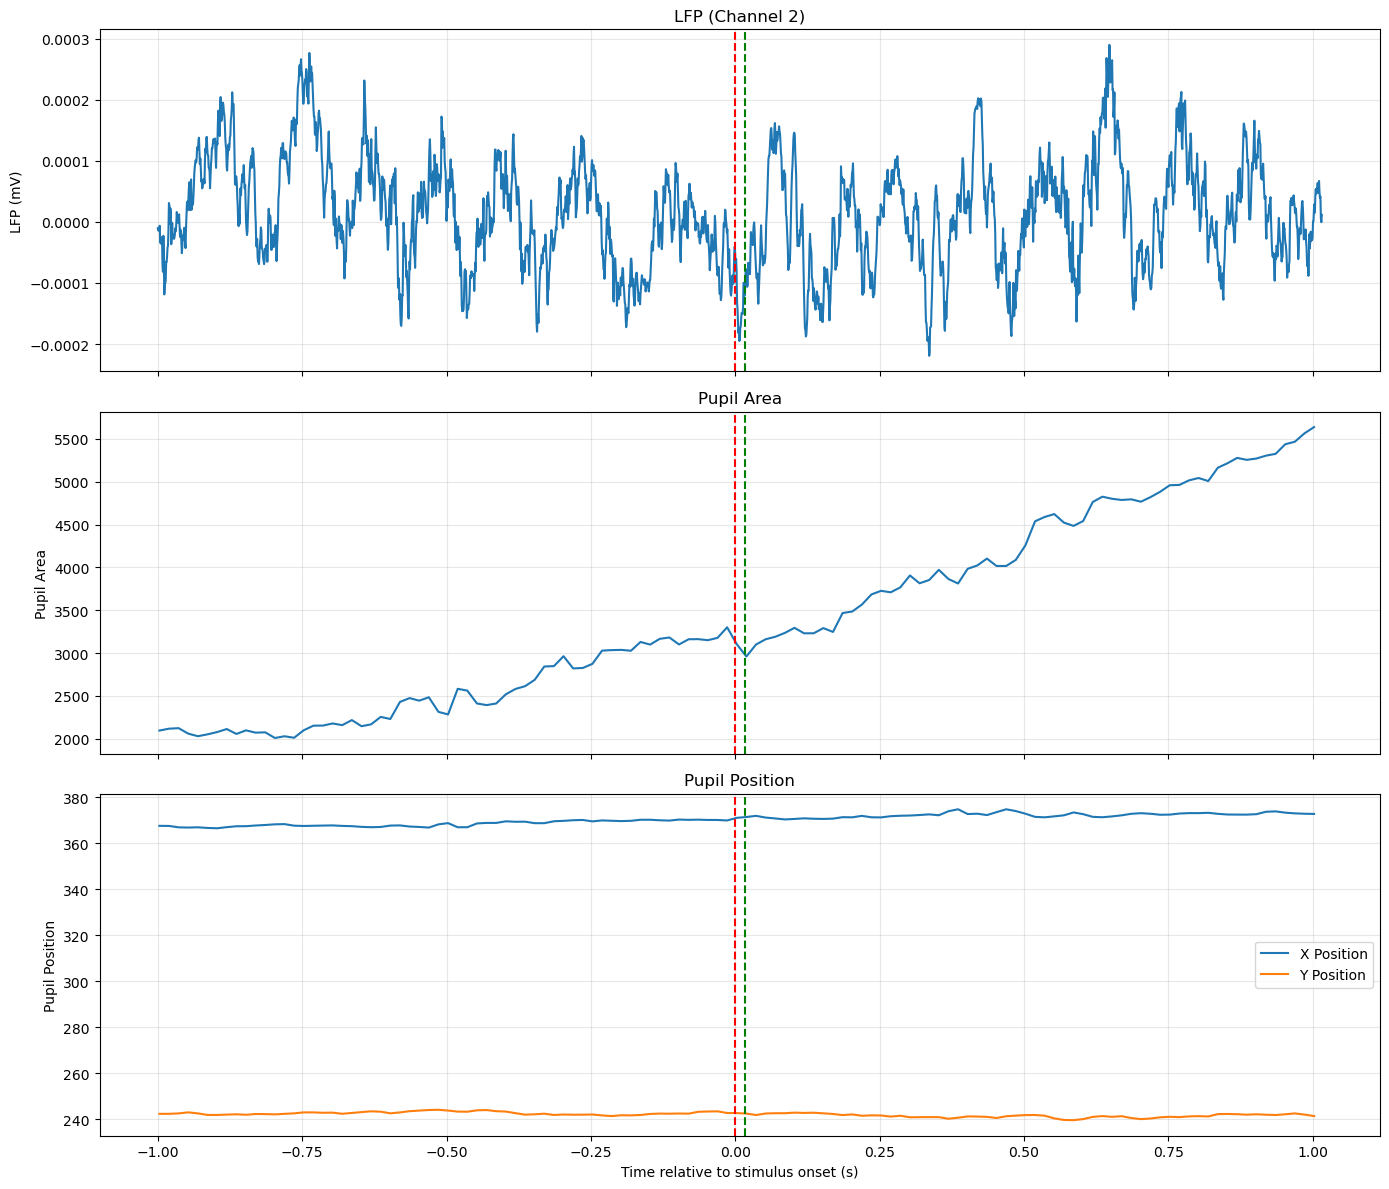

In [21]:
if 'EyeTracking' in session_nwb.acquisition:
    # Select a stimulus presentation
    stim_type = "SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations"
    stim_df = session_nwb.intervals[stim_type].to_dataframe()
    presentation_idx = 100  # Arbitrary choice
    
    stim_start = stim_df.iloc[presentation_idx]['start_time']
    stim_stop = stim_df.iloc[presentation_idx]['stop_time']
    
    # Add buffer before and after stimulus
    pre_stim = 1.0  # seconds
    post_stim = 1.0  # seconds
    window_start = stim_start - pre_stim
    window_end = stim_stop + post_stim
    
    # Extract eye tracking data for this time window
    eye_mask = (pupil_timestamps >= window_start) & (pupil_timestamps <= window_end)
    window_timestamps = pupil_timestamps[eye_mask]
    window_pupil_area = pupil_area[eye_mask]
    window_pupil_position = pupil_position[eye_mask]
    
    # Extract LFP data for this time window
    lfp_start_idx = np.argmin(np.abs(lfp_data.timestamps[:] - window_start))
    lfp_end_idx = np.argmin(np.abs(lfp_data.timestamps[:] - window_end))
    lfp_window = lfp_data.data[lfp_start_idx:lfp_end_idx, channel_idx]
    lfp_window_timestamps = lfp_data.timestamps[lfp_start_idx:lfp_end_idx]
    
    # Create figure with multiple subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    
    # Plot 1: LFP
    ax1.plot(lfp_window_timestamps - stim_start, lfp_window)
    ax1.set_ylabel('LFP (mV)')
    ax1.set_title(f'LFP (Channel {channel_idx})')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Pupil area
    ax2.plot(window_timestamps - stim_start, window_pupil_area)
    ax2.set_ylabel('Pupil Area')
    ax2.set_title('Pupil Area')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Pupil position (X and Y)
    ax3.plot(window_timestamps - stim_start, window_pupil_position[:, 0], label='X Position')
    ax3.plot(window_timestamps - stim_start, window_pupil_position[:, 1], label='Y Position')
    ax3.set_xlabel('Time relative to stimulus onset (s)')
    ax3.set_ylabel('Pupil Position')
    ax3.set_title('Pupil Position')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Add vertical lines for stimulus onset and offset on all plots
    for ax in [ax1, ax2, ax3]:
        ax.axvline(x=0, color='r', linestyle='--', label='Stimulus Onset')
        ax.axvline(x=stim_stop - stim_start, color='g', linestyle='--', label='Stimulus Offset')
    
    plt.tight_layout()
    plt.show()
else:
    print("Eye tracking data not found in this file")

## Running Speed and Neural Activity

The main session file also contains information about the animal's running speed. Let's examine if there's a relationship between running behavior and neural activity.

Running speed data shape: (394951,)
Speed timestamps length: 394951
Time range: 130.7202 - 7174.66956 seconds


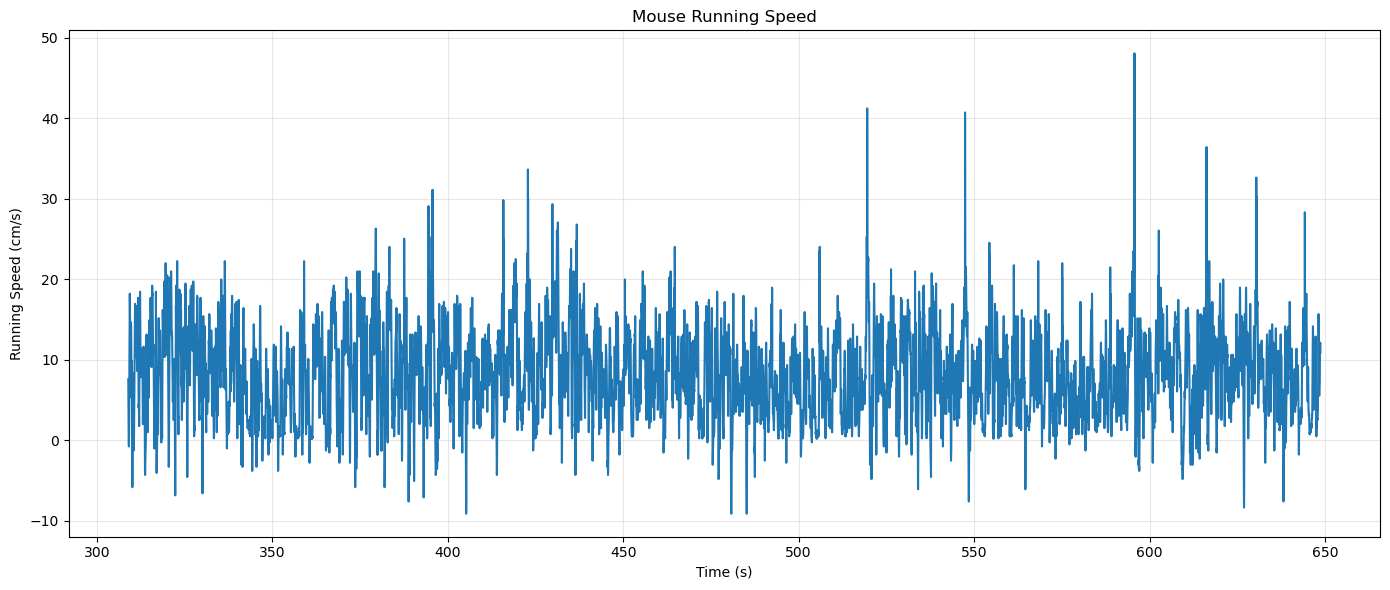

/opt/conda/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 2500 is greater than input length  = 1250, using nperseg = 1250
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


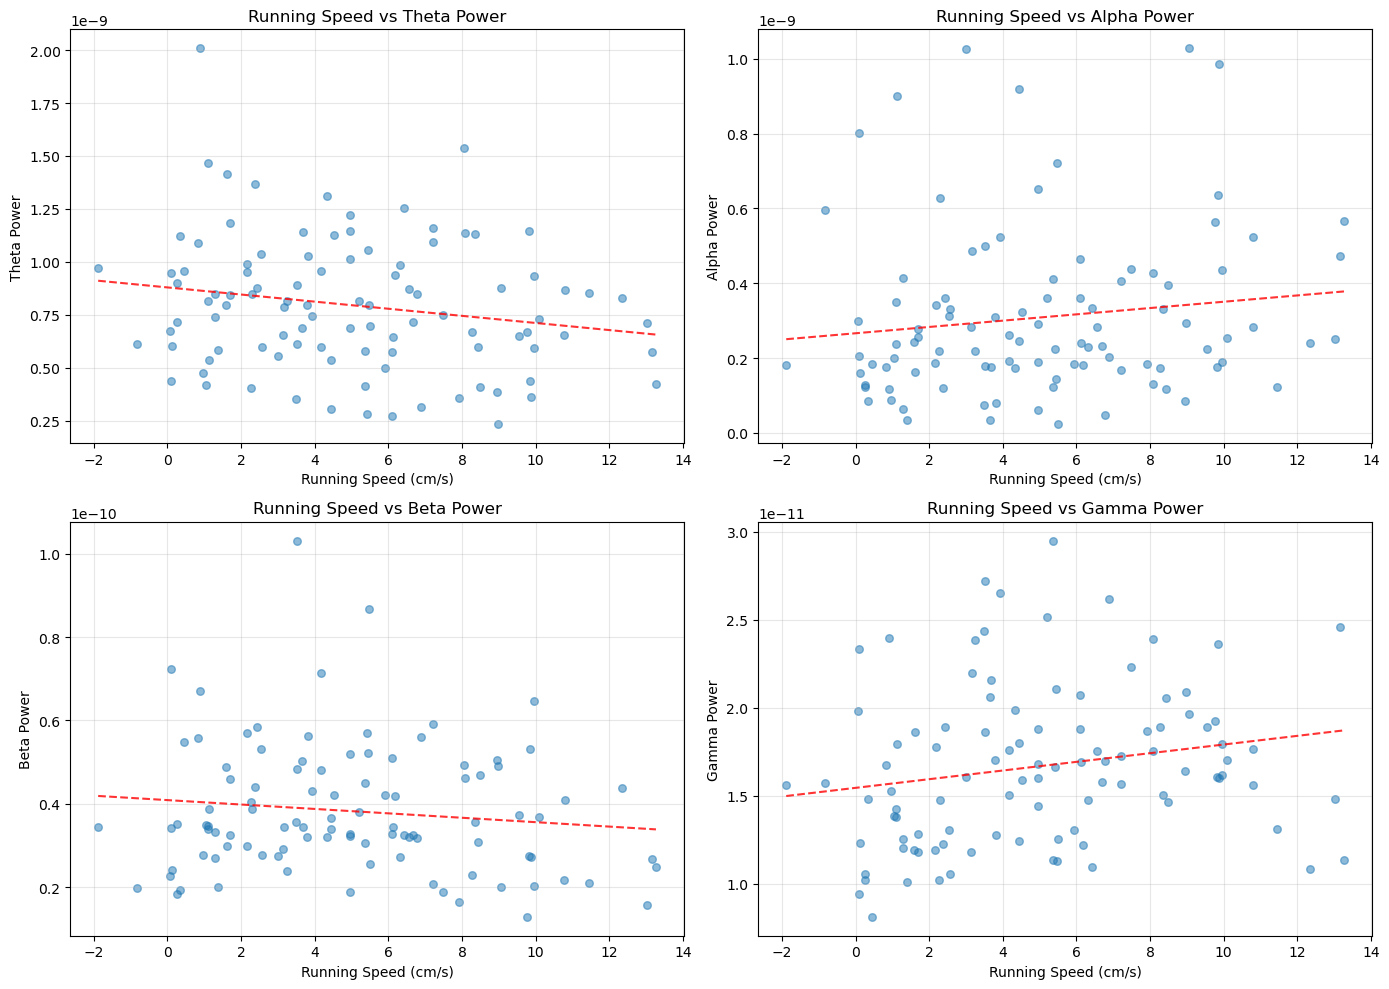

In [22]:
if 'running' in session_nwb.processing:
    # Access running speed data
    running = session_nwb.processing['running']
    running_speed = running.data_interfaces['running_speed']
    
    # Get running speed data and timestamps
    speed_data = running_speed.data[:]
    speed_timestamps = running_speed.timestamps[:]
    
    print(f"Running speed data shape: {speed_data.shape}")
    print(f"Speed timestamps length: {len(speed_timestamps)}")
    print(f"Time range: {speed_timestamps[0]} - {speed_timestamps[-1]} seconds")
    
    # Plot running speed for a section of the recording
    sample_start = 10000
    sample_end = 30000
    
    plt.figure(figsize=(14, 6))
    plt.plot(speed_timestamps[sample_start:sample_end], 
             speed_data[sample_start:sample_end])
    plt.xlabel('Time (s)')
    plt.ylabel('Running Speed (cm/s)')
    plt.title('Mouse Running Speed')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Plot relationship between running speed and LFP power
    # First, let's compute LFP power over time windows
    window_size = 1.0  # 1 second windows
    step_size = 0.5  # 0.5 second step
    
    # Define time windows
    window_starts = np.arange(speed_timestamps[0], speed_timestamps[-1] - window_size, step_size)
    window_ends = window_starts + window_size
    
    # Compute average speed and LFP power for each window
    window_speeds = []
    window_lfp_powers = {}
    
    for band_name, band_range in bands.items():
        window_lfp_powers[band_name] = []
    
    for start, end in zip(window_starts[:100], window_ends[:100]):  # Limit to 100 windows for computation speed
        # Find speed data indices for this window
        speed_mask = (speed_timestamps >= start) & (speed_timestamps <= end)
        if np.sum(speed_mask) > 0:
            avg_speed = np.mean(speed_data[speed_mask])
            window_speeds.append(avg_speed)
            
            # Find LFP data indices for this window
            lfp_start_idx = np.argmin(np.abs(lfp_data.timestamps[:] - start))
            lfp_end_idx = np.argmin(np.abs(lfp_data.timestamps[:] - end))
            lfp_window = lfp_data.data[lfp_start_idx:lfp_end_idx, channel_idx]
            
            fs = 1.0 / (lfp_data.timestamps[1] - lfp_data.timestamps[0])
            
            # Compute power in each frequency band
            for band_name, band_range in bands.items():
                band_power = compute_band_power(lfp_window, fs, band_range)
                window_lfp_powers[band_name].append(band_power)
    
    # Plot relationship between running speed and LFP power in different bands
    plt.figure(figsize=(14, 10))
    
    for i, (band_name, powers) in enumerate(window_lfp_powers.items()):
        plt.subplot(2, 2, i+1)
        plt.scatter(window_speeds, powers, alpha=0.5, s=30)
        plt.xlabel('Running Speed (cm/s)')
        plt.ylabel(f'{band_name.capitalize()} Power')
        plt.title(f'Running Speed vs {band_name.capitalize()} Power')
        plt.grid(True, alpha=0.3)
        
        # Add a line of best fit
        if len(window_speeds) > 0:
            z = np.polyfit(window_speeds, powers, 1)
            p = np.poly1d(z)
            plt.plot(sorted(window_speeds), p(sorted(window_speeds)), "r--", alpha=0.8)
    
    plt.tight_layout()
    plt.show()
else:
    print("Running speed data not found in this file")

## Summary and Future Directions

In this notebook, we've explored Dandiset 000690 from the Allen Institute Openscope - Vision2Hippocampus project, which investigates how visual information is processed across different brain regions from the thalamus to the hippocampus.

We've examined:

1. **LFP Data**: Local Field Potential recordings from probe 0, which provide insights into the collective activity of neural populations

2. **Visual Stimuli**: The various types of visual stimuli presented during the experiment, including different types of moving bars

3. **Neural Responses**: How LFP activity in different frequency bands changes in response to visual stimuli

4. **Eye Tracking**: How pupil position and size change during stimulus presentations

5. **Running Behavior**: How the animal's running speed might correlate with neural activity

### Future Directions

There are numerous ways to extend this analysis:

1. **Cross-regional analysis**: Compare responses across different brain regions by analyzing data from multiple probes

2. **Stimulus specificity**: Conduct more detailed analysis of neural responses to different stimulus parameters (width, velocity, contrast)

3. **Movie stimuli analysis**: Examine responses to the naturalistic movie stimuli and compare with responses to artificial stimuli

4. **Single-unit analysis**: Perform more detailed analysis of single neuron responses and their tuning properties

5. **Information flow**: Analyze how information is transformed and propagated from early visual areas to the hippocampus

6. **Behavioral correlates**: Investigate how neural activity relates to behavioral measures like pupil size and running speed in more detail

This dataset offers rich opportunities for investigating the neural mechanisms of visual processing across the brain's hierarchy, from simple sensory encoding to abstract representation.